In [1]:
import numpy as np
import ROOT
from math import exp as expo
from math import cos as cosine
exp=np.vectorize(expo)
cos=np.vectorize(cosine)
import matplotlib.pylab as plt
from matplotlib.pyplot import figure
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
import scipy.optimize as opt

Welcome to JupyROOT 6.24/06


In [2]:
file = ROOT.TFile.Open("run3BtoM_4hcopy_ratioFR_cov_mat_0_2.root")
#direc = file.Get("QFillByFillAnalyzerDB")
hist = ROOT.TH1D()
hist = file.Get("calo_histogram_sum_ratio")
hcov = ROOT.TH2D()
hcov = file.Get("hcov")

In [3]:
getBlinded = Blinders(FitType.Omega_a, "Ritwika's new  Blinding")

 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +
 +                                                                      +
 +           You have chose to blind your fitting according to          +
 +                omega_ref * (1 + (R +/- deltaR) *10^{-6})             +
 +                                                                      +
 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +


In [4]:
fit_start=30000
fit_stop=300000
fit_range=hist.FindBin(fit_stop)-hist.FindBin(fit_start)+1

T_a_true=4365.411
nbinshift=int((0.5*T_a_true)/hist.GetBinWidth(1))
T_a=2*nbinshift*hist.GetBinWidth(1)

y_val=np.empty(fit_range)
y_err=np.empty(fit_range)
x_val=np.empty(fit_range)

for ibin in range (0,fit_range):
    y_val[ibin]=hist.GetBinContent(ibin+hist.FindBin(fit_start))
    y_err[ibin]=hist.GetBinError(ibin+hist.FindBin(fit_start))
    x_val[ibin]=hist.GetBinCenter(ibin+hist.FindBin(fit_start))

y_cov = np.empty(shape=(fit_range,fit_range))

for irow in range (0, fit_range):
      for icol in range(0, fit_range):
            y_cov[irow][icol]=hcov.GetBinContent(irow+hist.FindBin(fit_start),icol+hist.FindBin(fit_start))

In [5]:
print(y_cov[0][0])
mat=np.linalg.eigvalsh(y_cov)
for irow in range (0, fit_range):
    if mat[irow]<=0:
        print(irow,"\n")

3.273694096610478e-09


In [6]:
def fit_func(time: np.double,
             asym: np.double = 0.0, 
             R: np.double = 0.0, 
             phi: np.double = 0.0,
             asym_cbo = 0.0,
             tau_cbo = 0.0,
             omega_cbo = 0.0,
             phi_cbo = 0.0,
             asym_cbo_A = 0.0,
             phi_cbo_A=0.0,
             A_cbo_phi= 0.0,
             phi_cbo_phi=0.0,
             asym_vw= 0.0,
             tau_vw = 0.0,
             omega_vw = 0.0,
             phi_vw = 0.0,
             asym_vbo= 0.0,
             tau_vbo = 0.0,
             omega_vbo = 0.0,
             phi_vbo = 0.0,
             asym_2cbo= 0.0,
             phi_2cbo = 0.0,
             A_cbot = 0.0,
             tau_cbot = 0.0)-> np.double:
    
    omega_cbot=omega_cbo*(1+A_cbot*exp(-time/tau_cbot))
    omega_cbotf=omega_cbo*(1+A_cbot*exp(-(time+T_a/2)/tau_cbot))
    omega_cbotb=omega_cbo*(1+A_cbot*exp(-(time-T_a/2)/tau_cbot))

    tau_2cbo=tau_cbo/2
    omega_2cbo=2*omega_cbo
    
    Ncbo=(1 + asym_cbo*exp(-time/tau_cbo)*cos(omega_cbot*time - phi_cbo))
    Ncbof=(1+ asym_cbo*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbotf*(time + T_a/2) - phi_cbo))
    Ncbob=(1+ asym_cbo*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbotb*(time - T_a/2) - phi_cbo))
    Acbo=(1+ asym_cbo_A*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo_A));
    Acbof=(1+ asym_cbo_A*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo_A))
    Acbob=(1+ asym_cbo_A*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo_A))
    phicbo=(A_cbo_phi*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo_phi))
    phicbof=(A_cbo_phi*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo_phi))
    phicbob=(A_cbo_phi*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo_phi))
    Nvw=(1+ asym_vw*exp(-time/tau_vw)*cos(omega_vw*time - phi_vw))
    Nvwf=(1+ asym_vw*exp(-(time + T_a/2)/tau_vw)*cos(omega_vw*(time + T_a/2) - phi_vw))
    Nvwb=(1+ asym_vw*exp(-(time - T_a/2)/tau_vw)*cos(omega_vw*(time - T_a/2) - phi_vw))
    Nvbo=(1+ asym_vbo*exp(-time/tau_vbo)*cos(omega_vbo*time - phi_vbo))
    Nvbof=(1+ asym_vbo*exp(-(time + T_a/2)/tau_vbo)*cos(omega_vbo*(time + T_a/2) - phi_vbo))
    Nvbob=(1+ asym_vbo*exp(-(time - T_a/2)/tau_vbo)*cos(omega_vbo*(time - T_a/2) - phi_vbo))
    N2cbo=(asym_2cbo*exp(-time/tau_2cbo)*cos(omega_2cbo*time - phi_2cbo))
    N2cbof=(asym_2cbo*exp(-(time + T_a/2)/tau_2cbo)*cos(omega_2cbo*(time + T_a/2) - phi_2cbo))
    N2cbob=(asym_2cbo*exp(-(time - T_a/2)/tau_2cbo)*cos(omega_2cbo*(time - T_a/2) - phi_2cbo))
    
    Ncbo=Ncbo+N2cbo
    Ncbof=Ncbof+N2cbof
    Ncbob=Ncbob+N2cbob

    
    f=(1+ asym*Acbo*cos((getBlinded.paramToFreq(R)/1000.)*time - phi - phicbo))

    ff=(1+ asym*Acbof*cos((getBlinded.paramToFreq(R)/1000.)*(time + T_a/2) - phi - phicbof))

    fb=(1+ asym*Acbob*cos((getBlinded.paramToFreq(R)/1000.)*(time - T_a/2) - phi - phicbob))

    
    return (2*f*Ncbo*Nvw*Nvbo - ff*Ncbof*Nvwf*Nvbof - fb*Ncbob*Nvwb*Nvbob)/(2*f*Ncbo*Nvw*Nvbo + ff*Ncbof*Nvwf*Nvbof + fb*Ncbob*Nvwb*Nvbob)

In [26]:
p_init=[2.28839e-01,
        0.000000,
        4.02000e+00,
        2.42604e-03,
        2.54062e+05,
        2.330e-03,
        5.56481e-01,
        6.91318e-04,
        -5.78075e+00,
        6.39026e-05,
        3.52887e+01,
        2.36536e-04,
        1.38419e+05,
        1.389e-02,
        2.73495e-01,
        -1.00112e-03,
        3.48295e+04,
        1.407e-02,
        -1.99555e+01,
        1.10668e-04,
        3.06805e+00,
        #0.1,
        #4500]
        0.002,
        85000]

In [27]:
pars2, cov2 = opt.curve_fit(f=fit_func, xdata=x_val, ydata=y_val, p0=p_init, sigma=y_err)

In [28]:
p_init=pars2

In [29]:
pars_final, cov_final = opt.curve_fit(f=fit_func, xdata=x_val, ydata=y_val, p0=p_init, sigma=y_cov)

In [30]:
stdevs = np.sqrt(np.diag(cov_final))
for ipar in range(0,23):
    print(pars_final[ipar],"  +-  ",stdevs[ipar],"  \n")

0.22934870967180476   +-   7.16740281276596e-06   

-35.36046748158166   +-   0.40000590480466275   

4.023026156371936   +-   6.070894237744685e-05   

0.0018662804762108274   +-   2.0888086583433745e-05   

230029.6057243943   +-   7333.603252882767   

0.002329037617050318   +-   6.692854305989794e-07   

-0.545364701423536   +-   0.07058380772251602   

0.0003841472684607854   +-   6.269229985553771e-05   

-6.661112862610366   +-   0.16775743462926795   

-6.387808403537461e-05   +-   6.375644930992003e-05   

34.91064019319329   +-   0.9866371582680639   

0.0004638917948508989   +-   3.6657337307769035e-05   

85793.45328693047   +-   8897.59722334032   

0.013892511779450578   +-   1.2051807535871434e-06   

-0.2332869373528112   +-   0.07860482724454876   

-0.0038878352051242787   +-   0.0006190665718717943   

15920.983546733454   +-   1080.7319773684333   

0.01410003583442751   +-   4.247206771376761e-06   

-18.802163229460135   +-   0.15848257098870772   

0.000114510027

In [31]:
pars_final

array([ 2.29348710e-01, -3.53604675e+01,  4.02302616e+00,  1.86628048e-03,
        2.30029606e+05,  2.32903762e-03, -5.45364701e-01,  3.84147268e-04,
       -6.66111286e+00, -6.38780840e-05,  3.49106402e+01,  4.63891795e-04,
        8.57934533e+04,  1.38925118e-02, -2.33286937e-01, -3.88783521e-03,
        1.59209835e+04,  1.41000358e-02, -1.88021632e+01,  1.14510028e-04,
        3.13890629e+00, -1.39246461e-03,  9.47146872e+04])

In [32]:
stdevs

array([7.16740281e-06, 4.00005905e-01, 6.07089424e-05, 2.08880866e-05,
       7.33360325e+03, 6.69285431e-07, 7.05838077e-02, 6.26922999e-05,
       1.67757435e-01, 6.37564493e-05, 9.86637158e-01, 3.66573373e-05,
       8.89759722e+03, 1.20518075e-06, 7.86048272e-02, 6.19066572e-04,
       1.08073198e+03, 4.24720677e-06, 1.58482571e-01, 1.35949383e-05,
       1.40697253e-01, 1.15238645e-03, 7.12156423e+04])

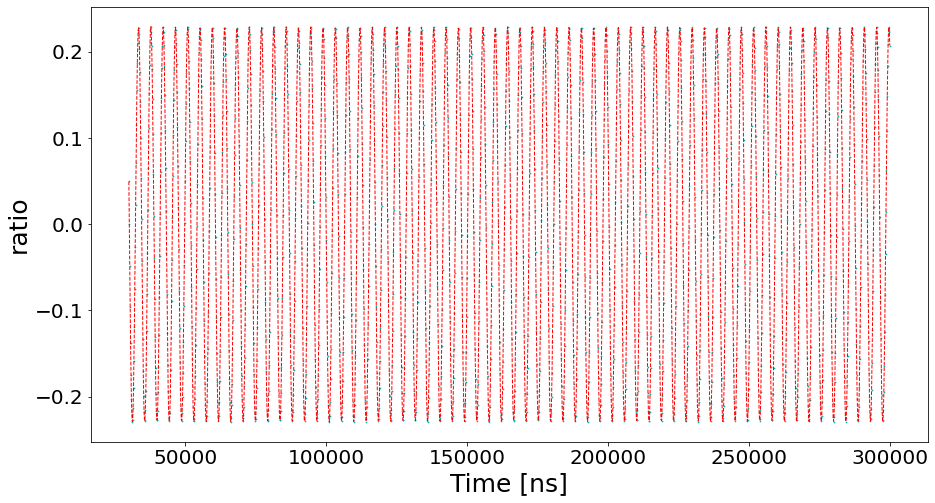

In [33]:
# Plot the noisy exponential data
plt.figure(figsize=(15,8))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.scatter(x_val, y_val, s=0.5, color='#00b3b3', label='Data')
plt.plot(x_val, fit_func(x_val, *pars_final), linestyle='--', linewidth=1, color='red')
plt.xlabel('Time [ns]',fontsize=25)
plt.ylabel('ratio',fontsize=25)
#plt.ylim([0.0, 6000000000])
#plt.xlim([100000,150000])
plt.show()

In [34]:
# Get the standard deviations of the parameters (square roots of the # diagonal of the covariance)
# Calculate the residuals
res = (y_val - fit_func(x_val, *pars_final))/y_err

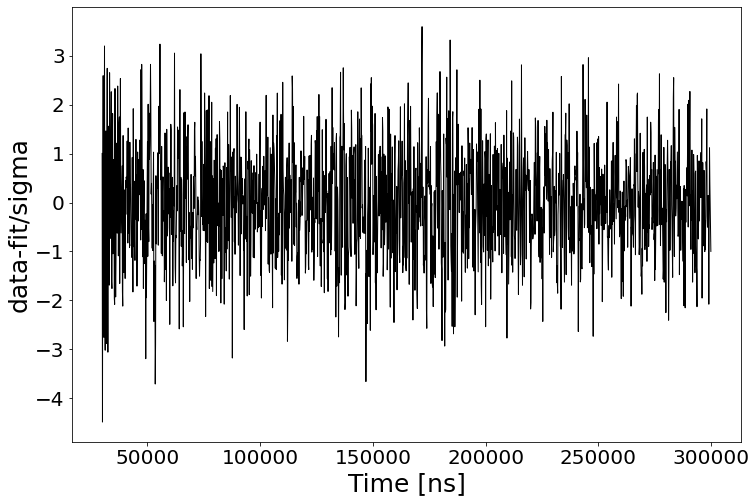

In [35]:
plt.figure(figsize=(12,8))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.plot(x_val, res, linestyle='solid', linewidth=1, color='black')
plt.xlabel('Time [ns]',fontsize=25)
plt.ylabel('data-fit/sigma',fontsize=25)
plt.savefig('run3btom_res.jpg')

In [36]:
stdevs

array([7.16740281e-06, 4.00005905e-01, 6.07089424e-05, 2.08880866e-05,
       7.33360325e+03, 6.69285431e-07, 7.05838077e-02, 6.26922999e-05,
       1.67757435e-01, 6.37564493e-05, 9.86637158e-01, 3.66573373e-05,
       8.89759722e+03, 1.20518075e-06, 7.86048272e-02, 6.19066572e-04,
       1.08073198e+03, 4.24720677e-06, 1.58482571e-01, 1.35949383e-05,
       1.40697253e-01, 1.15238645e-03, 7.12156423e+04])

In [37]:
fou=abs(np.fft.fft(res))
xfft= np.linspace(0,6.667,num=1801)
xfft[800]

2.963111111111111

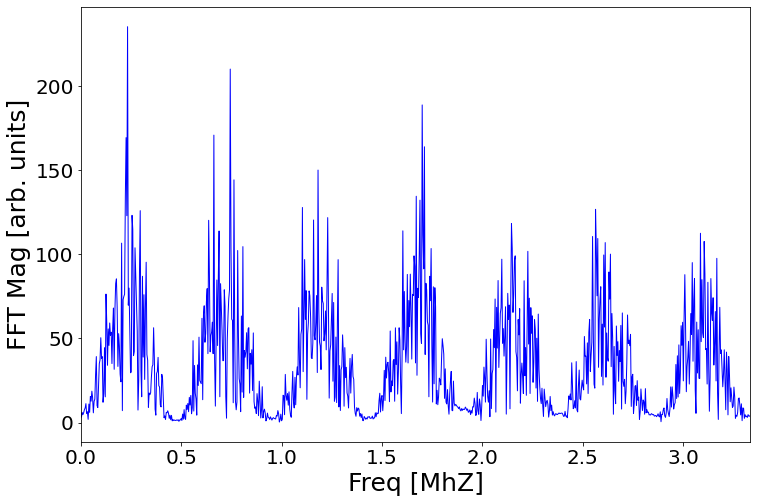

In [38]:
plt.figure(figsize=(12,8))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.plot(xfft, fou, linestyle='solid', linewidth=1, color='blue')
plt.xlim([0,6.667/2])
plt.xlabel('Freq [MhZ]',fontsize=25)
plt.ylabel('FFT Mag [arb. units]',fontsize=25)
plt.savefig('run3btom_fft.jpg')

In [39]:
chi2=np.dot((np.transpose(y_val-fit_func(x_val, *pars_final))),(np.dot((np.linalg.inv(y_cov)),(y_val-fit_func(x_val, *pars_final)))))

In [40]:
chi2

1883.7420124267042

In [41]:
ndf=fit_range-len(pars_final)

In [42]:
red_chi2=chi2/ndf

In [43]:
red_chi2

1.0594724479340294

In [44]:
ndf

1778